In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#import dataset from average_temperature_ds.csv file
dataset = pd.read_csv('average_temperature_ds.csv')
dataset = dataset.dropna(subset=["avrg_temp"])
dataset=dataset.reset_index(drop=True)
dataset

,date,days_min0_degrees,days_min32_degrees,days_max32_degrees,days_max70_degrees,days_max90_degrees,numD_fog,numD_thunder,min_temp_ext,max_snow_depth,max_daily_snowfall,max_daily_rain,max_temp_ext,total_rain,total_snowfall,avrg_temp,avg_max_temp,avg_min_temp
0,Jul 1945,0,0,0,31,3,11,14,13.9,0,0,52.1,37.2,280.9,0,24.70,29.00,20.41
1,Aug 1945,0,0,0,30,4,7,4,13.3,0,0,17.3,34.4,66.7,0,23.79,28.79,18.78
2,Sep 1945,0,0,0,28,2,10,4,12.2,0,0,34.0,32.8,99.8,0,22.67,27.02,18.31
3,Oct 1945,0,0,0,14,0,9,1,3.3,0,0,11.7,27.2,34.0,0,14.25,19.91,8.60
4,Nov 1945,0,6,0,6,0,9,1,-3.9,0,0,41.1,25.6,107.7,0,9.61,14.42,4.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,Apr 2023,0,0,0,18,0,7,5,4.4,0,0,38.9,31.1,90.6,0,16.73,22.72,10.74
918,May 2023,0,0,0,26,0,7,1,8.3,0,0,21.8,29.4,34.1,0,18.34,23.76,12.91
919,Jun 2023,0,0,0,29,4,6,5,14.4,0,0,21.1,34.4,53.3,0,23.36,28.74,17.98
920,Jul 2023,0,0,0,31,15,13,18,20.6,0,0,33.8,36.1,164.2,0,27.56,32.28,22.83


In [4]:
training_set = dataset.iloc[:,15:16].values
training_set

array([[24.7 ],
       [23.79],
       [22.67],
       [14.25],
       [ 9.61],
       [ 0.51],
       [ 2.66],
       [ 4.  ],
       [11.71],
       [13.29],
       [18.49],
       [22.44],
       [24.58],
       [22.51],
       [21.31],
       [16.33],
       [11.1 ],
       [ 5.26],
       [ 5.4 ],
       [-0.29],
       [ 4.47],
       [13.97],
       [18.11],
       [22.03],
       [24.17],
       [26.08],
       [20.98],
       [18.05],
       [ 7.86],
       [ 2.54],
       [-1.76],
       [ 2.65],
       [ 8.89],
       [13.29],
       [18.13],
       [23.3 ],
       [25.55],
       [24.33],
       [20.79],
       [13.4 ],
       [10.79],
       [ 4.51],
       [ 5.9 ],
       [ 6.59],
       [ 8.14],
       [12.81],
       [18.86],
       [23.97],
       [27.21],
       [25.33],
       [19.5 ],
       [17.41],
       [ 8.95],
       [ 5.5 ],
       [ 8.85],
       [ 3.69],
       [ 5.38],
       [11.32],
       [18.07],
       [23.29],
       [24.53],
       [24.21],
       [

In [5]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
x_train = []
y_train = []
n_future = 12 # next 12 months temperature forecast
n_past = 100 # Past 100 months
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1) )

In [7]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout,Bidirectional
# Fitting RNN to training set using Keras Callbacks. Read Keras callbacks docs for more info.

In [8]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1],1) ) ))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 100 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 100 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 100))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
regressor.fit(x_train, y_train, epochs=500,batch_size=32 )

Epoch 1/500
26/26 [==============================] - 14s 196ms/step - loss: 0.1374 - acc: 0.0999
Epoch 2/500
26/26 [==============================] - 6s 229ms/step - loss: 0.0791 - acc: 0.0789
Epoch 3/500
26/26 [==============================] - 5s 194ms/step - loss: 0.0782 - acc: 0.0826
Epoch 4/500
26/26 [==============================] - 6s 227ms/step - loss: 0.0765 - acc: 0.0962
Epoch 5/500
26/26 [==============================] - 5s 205ms/step - loss: 0.0748 - acc: 0.0814
Epoch 6/500
26/26 [==============================] - 5s 191ms/step - loss: 0.0675 - acc: 0.1430
Epoch 7/500
26/26 [==============================] - 6s 223ms/step - loss: 0.0405 - acc: 0.2787
Epoch 8/500
26/26 [==============================] - 5s 196ms/step - loss: 0.0170 - acc: 0.3946
Epoch 9/500
26/26 [==============================] - 6s 225ms/step - loss: 0.0136 - acc: 0.4180
Epoch 10/500
26/26 [==============================] - 5s 180ms/step - loss: 0.0129 - acc: 0.4180
Epoch 11/500
26/26 [==================

In [9]:
# read test dataset
testdataset = pd.read_csv('average_temperature_ds.csv')
#get only the temperature column
testdataset = testdataset.iloc[810:910,15:16].values
real_temperature = pd.read_csv('average_temperature_ds.csv')
real_temperature = real_temperature.iloc[910:,15:16].values
testing = sc.transform(testdataset)
testing = np.array(testing)
testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))

In [10]:
predicted_temperature = regressor.predict(testing)
predicted_temperature = sc.inverse_transform(predicted_temperature)
predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))

1/1 [==============================] - 2s 2s/step


In [11]:
predicted_temperature

array([[21.613117 ],
       [15.593596 ],
       [ 9.51848  ],
       [ 5.8687453],
       [ 5.920027 ],
       [ 7.76804  ],
       [10.508911 ],
       [15.254695 ],
       [20.035133 ],
       [24.660957 ],
       [27.043531 ],
       [25.4061   ]], dtype=float32)

In [12]:
real_temperature

array([[22.62],
       [14.54],
       [11.43],
       [ 4.52],
       [ 7.31],
       [ 8.19],
       [ 9.51],
       [16.73],
       [18.34],
       [23.36],
       [27.56],
       [22.99]])

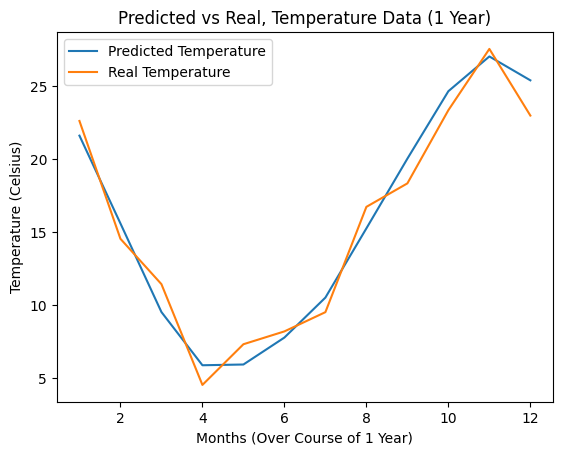

In [20]:
four_month_x = [1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.plot(four_month_x,predicted_temperature, label="Predicted Temperature")
plt.plot(four_month_x,real_temperature, label="Real Temperature")
plt.xlabel("Months (Over Course of 1 Year)")
plt.ylabel("Temperature (Celsius)")
plt.title("Predicted vs Real, Temperature Data (1 Year)")
plt.legend()
plt.show()

In [14]:
from sklearn import metrics
# other prediction metrics

# R^2, close to 1 (0.9618866330446012)
print(metrics.r2_score(real_temperature, predicted_temperature))

# RMSE, less than 0.5 (1.4009391758683407)
print(np.sqrt(metrics.mean_squared_error(real_temperature, predicted_temperature)))

# MAE, less than 0.5 (1.2946293417612713)
print(metrics.mean_absolute_error(real_temperature, predicted_temperature))

0.9618866330446012
1.4009391758683407
1.2946293417612713
